Clean mnist images, but with machines trained with noise conditioning

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
savedir = "saved_models/clean_noise_conditioned/"

In [3]:
training_samples = np.load(savedir + "training_samples.npy")
final_samples = np.load(savedir + "final_samples.npy").item()
variables = np.load(savedir + "variables.npy")
data_seeds = np.load(savedir + "sample_seeds.npy")
training_seeds = np.load(savedir + "training_seeds.npy")
randseeds = np.load(savedir + "randseed.npy")

In [4]:
data_seeds = np.reshape(data_seeds,(-1, 28,28))
randseeds = np.reshape(randseeds,(-1, 28,28))
nseed = data_seeds.shape[0]

In [12]:
noise_kernel = np.asarray([v['noise_kernel'] for v in variables])
noise_bias = np.asarray([v['noise_bias'] for v in variables])

In [13]:
p01 = 1.0 / (np.exp(noise_kernel + noise_bias) +1)
p10 = 1.0 / (np.exp(-noise_bias))

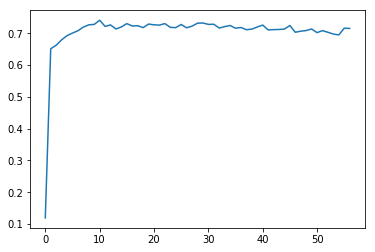

In [14]:
plt.plot(p01)

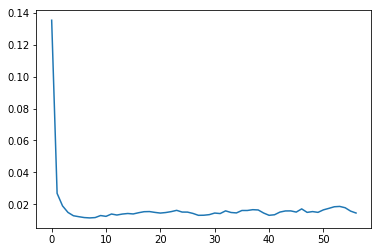

In [15]:
plt.plot(p10)

### Look at the trained weights

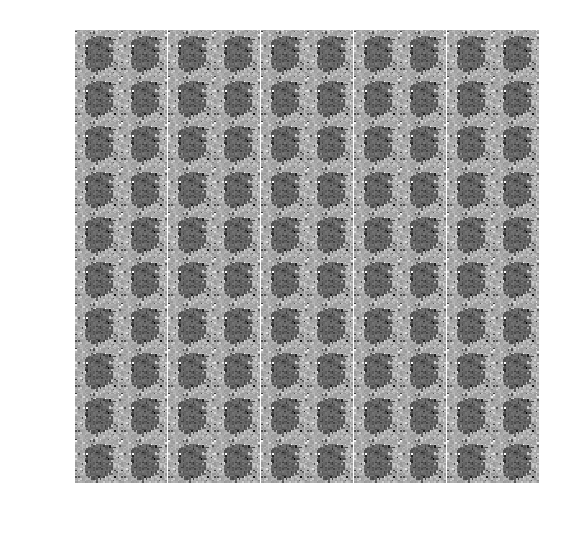

In [19]:
s=10
fig, axes = plt.subplots(s,s, figsize=(3,3),dpi=200)
for ii in range(s):
    for jj in range(s):
        ax = axes[ii,jj]
        w=np.reshape(variables[-1]['weights'][:,ii*s + jj], (28,28))
        ax.imshow(w, cmap='binary')
        ax.set_axis_off()
plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig(savedir+"weights_examples.png")

## Look at samples produced by the trained model, when seeded by the dataset

In [20]:
samples_dataseed = final_samples['dataseed']
numsamples = len(samples_dataseed)
samples_randseed = final_samples['randseed']


In [21]:
snapshots_dataseed = np.reshape(np.asarray([samples_dataseed[k]['samples'] for k in range(numsamples)]), 
                                    (numsamples,nseed, 28,28))
probs_dataseed = np.reshape(np.asarray([samples_dataseed[k]['probs'] for k in range(numsamples)]), 
                                    (numsamples,nseed, 28,28))
snapshots_randseed = np.reshape(np.asarray([samples_randseed[k]['samples'] for k in range(numsamples)]), 
                                    (numsamples,nseed, 28,28))
probs_randseed = np.reshape(np.asarray([samples_randseed[k]['probs'] for k in range(numsamples)]), 
                                    (numsamples,nseed, 28,28))


In [26]:
def do_sampling_plot(images, seeds, numtoplot=10,nseed=10, dpi=200):
    fig, axes = plt.subplots(nseed, numtoplot,figsize=(3,3*(nseed/numtoplot)),dpi=200)
    for ii in range(numtoplot):
        for jj in range(nseed):
            ax = axes[jj,ii]
            if ii==0:
                image = seeds[jj,...]
            else:
                image=images[ii-1,jj,...]
            ax.imshow(image, cmap='binary')
            ax.set_axis_off()
    plt.subplots_adjust(wspace=0, hspace=0)
    return fig, ax

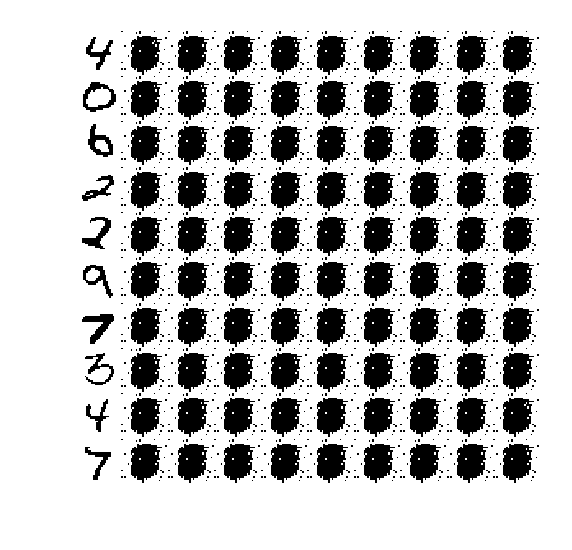

In [27]:
fig, ax = do_sampling_plot(snapshots_dataseed, data_seeds,nseed=10)
fig.savefig(savedir+"trained_samples_dataseed.png")

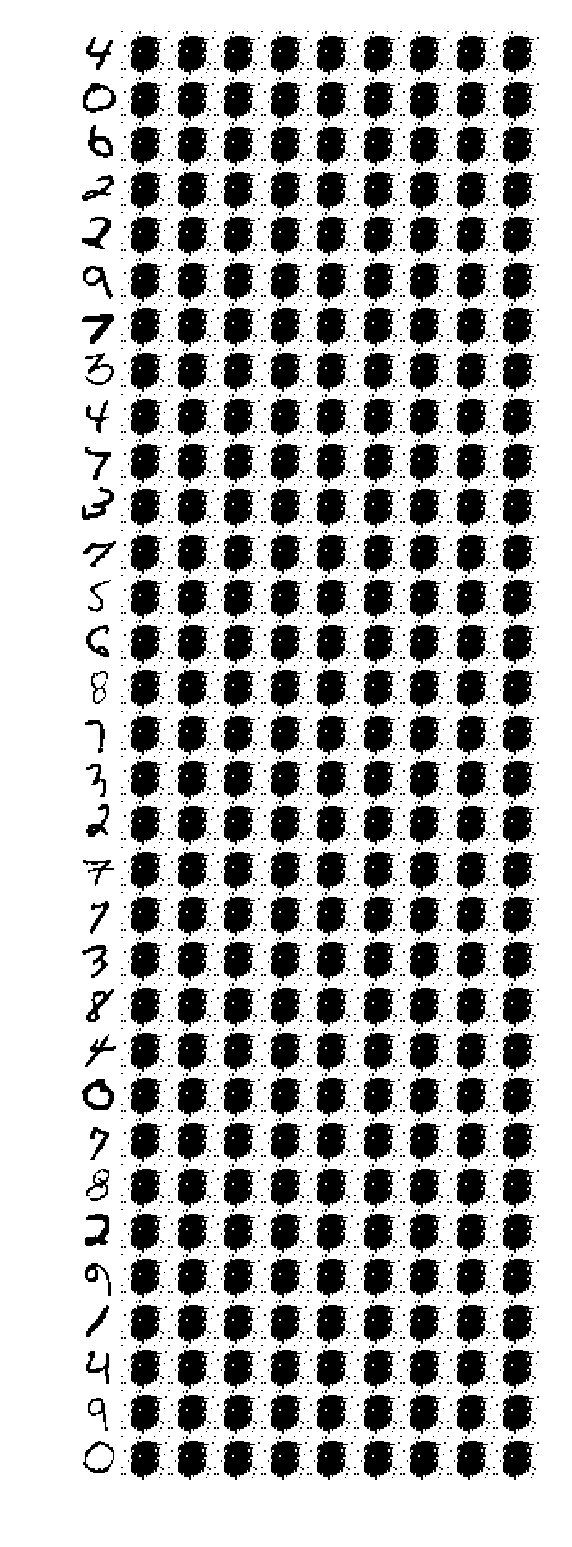

In [24]:
fig, ax = do_sampling_plot(probs_dataseed, data_seeds)
fig.savefig(savedir+"trained_probs_dataseed.png")

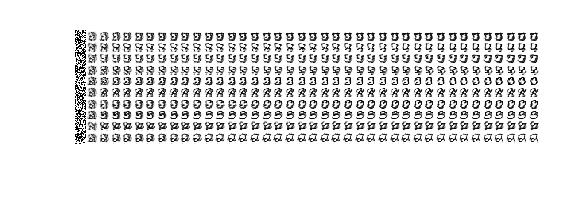

In [281]:
fig, ax = do_sampling_plot(probs_randseed, randseeds,numtoplot=40, dpi=300)
fig.savefig(savedir+"trained_probs_randseed.png")

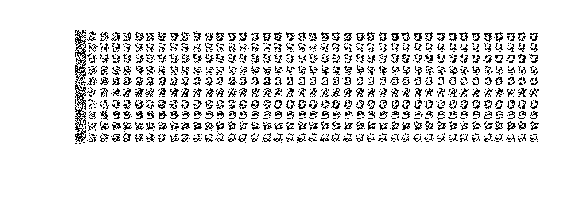

In [279]:
fig, ax = do_sampling_plot(snapshots_randseed, randseeds,numtoplot=40)
fig.savefig(savedir+"trained_samples_randseed.png")